In [37]:
import csv
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib notebook

<IPython.core.display.Javascript object>


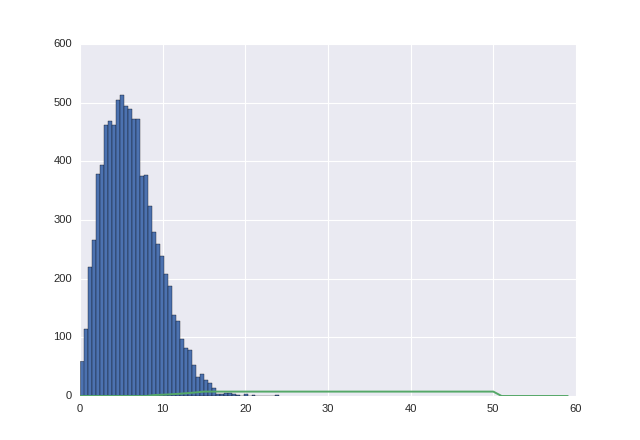

In [42]:
values = np.random.rayleigh(5, 8760)
ax = plt.hist(values, bins=50)

In [43]:
cut_in_speed = 4.5
cut_out_speed = 25
rated_speed = 7.5

rated_power = 7.5

In [81]:
def power_calc(wind_speed, rated_speed, rated_power, cut_in, cut_out):
    if wind_speed < cut_in:
        wind_power = 0
    elif wind_speed > cut_out:
        wind_power = 0
    elif wind_speed >= rated_speed:
        wind_power = rated_power
    else:
        power_frac = (wind_speed - cut_in) / (rated_speed - cut_in)
        wind_power = rated_power * power_frac
        
    return wind_power
        

In [82]:
powers = [power_calc(speed/10, rated_speed, rated_power, cut_in_speed, cut_out_speed) for speed in np.arange(300)]

<IPython.core.display.Javascript object>


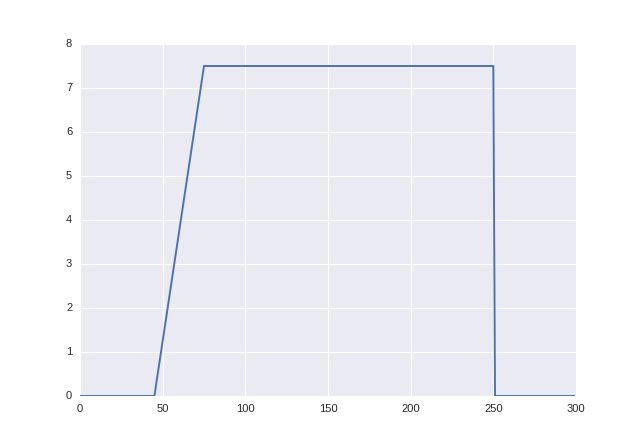

In [83]:
fig, ax = plt.subplots()

plt.plot(powers)

In [86]:
energy = [power_calc(speed, rated_speed, rated_power, cut_in_speed, cut_out_speed) for speed in values]

<IPython.core.display.Javascript object>


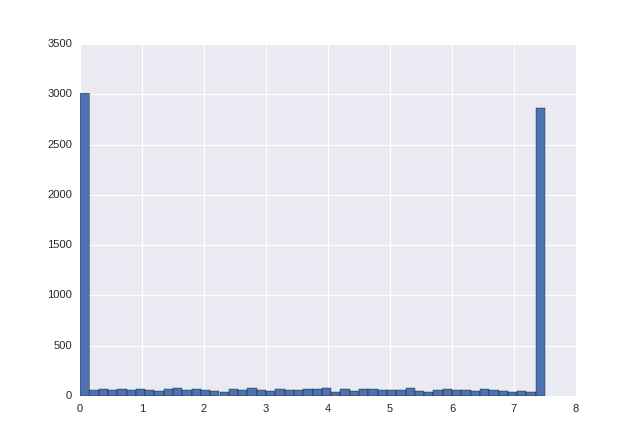

(array([ 3010.,    56.,    66.,    55.,    69.,    64.,    67.,    59.,
           54.,    72.,    76.,    56.,    74.,    58.,    54.,    43.,
           70.,    59.,    77.,    64.,    53.,    74.,    61.,    60.,
           65.,    67.,    76.,    40.,    67.,    46.,    66.,    68.,
           56.,    64.,    58.,    76.,    45.,    42.,    60.,    65.,
           63.,    62.,    46.,    67.,    56.,    53.,    44.,    48.,
           41.,  2868.]),
 array([ 0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,  1.05,  1.2 ,
         1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,  2.4 ,  2.55,
         2.7 ,  2.85,  3.  ,  3.15,  3.3 ,  3.45,  3.6 ,  3.75,  3.9 ,
         4.05,  4.2 ,  4.35,  4.5 ,  4.65,  4.8 ,  4.95,  5.1 ,  5.25,
         5.4 ,  5.55,  5.7 ,  5.85,  6.  ,  6.15,  6.3 ,  6.45,  6.6 ,
         6.75,  6.9 ,  7.05,  7.2 ,  7.35,  7.5 ]),
 <a list of 50 Patch objects>)

In [89]:
fig, ax = plt.subplots()

plt.hist(energy, bins=50)

In [ ]:
with open('locations.txt', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Location', 'Country', 'Lat', 'Long'])
    for loc in locations:
        if loc['country'] == 'SCOTLAND':
            writer.writerow([loc['name'], loc['country'], loc['lat'], loc['lon']])